# LEEP 2024 Multi-Country CEA

In [99]:
import numpy as np
import pandas as pd
import squigglepy as sq
from squigglepy.numbers import K

pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
idx = pd.IndexSlice

COUNTRIES = ["Malawi", "Madagascar", "Sierra Leone", "Liberia", "Angola", "Pakistan",
             "Niger", "Zimbabwe", "Bolivia", "Ghana", "Nigeria", "Cote d'Ivoire", "Senegal"]
YEARS = range(2021, 2101)

# Number of samples
# N = 100*K
N = 10

SAMPLE_YEAR_INDEX = pd.MultiIndex.from_product([range(N), YEARS], names=["Sample", "Year"])

## Inputs

### Population

The population and projected future population estimates for each country are from the [UN population projections](https://population.un.org/wpp/Download/Standard/CSV/).

In [19]:
# TODO(drw): Could use uncertainty estimates here?
population = pd.read_csv('population.csv', index_col=0)
population.head()

,Malawi,Madagascar,Sierra Leone,Liberia,Angola,Pakistan,Niger,Zimbabwe,Bolivia,Ghana,Nigeria,Cote d'Ivoire,Senegal
Year,,,,,,,,,,,,,
2021,19889742,28915652,8420642,5193422,34503776,231402110,25252722,15993525,12079474,32833036,213401330,27478250,16876726
2022,20405318,29611718,8605723,5302690,35588996,235824860,26207982,16320539,12224114,33475870,218541220,28160548,17316452
2023,20931750,30325736,8791092,5418378,36684212,240485660,27202844,16665407,12388575,34121990,223804640,28873040,17763164
2024,21475962,31056608,8977979,5536954,37804630,245209810,28238976,17020320,12567344,34777524,229152220,29603304,18221560
2025,22033992,31797310,9165381,5657236,38942796,249948880,29315974,17375286,12746151,35439790,234573600,30344186,18687806


### Births

Projections of future annual births in each country are from the [UN population projections](https://population.un.org/wpp/Download/Standard/Population/).

In [20]:
# TODO(drw): Could use uncertainty estimates here?
births = pd.read_csv('births.csv', index_col=0)
births.head()

,Malawi,Madagascar,Sierra Leone,Liberia,Angola,Pakistan,Niger,Zimbabwe,Bolivia,Ghana,Nigeria,Cote d'Ivoire,Senegal
Year,,,,,,,,,,,,,
2021,653703,895045,264106,162685,1338792,6374741,1144371,488807,263820,904679,7923294,932943,549984
2022,665678,906130,265023,164452,1359723,6424944,1180654,491195,264070,906677,8002758,943133,555696
2023,678962,918152,266774,166979,1381742,6474370,1216927,493840,263936,909913,8109136,959962,562482
2024,687950,927190,267219,169153,1404185,6512176,1256001,496655,265235,911299,8234399,974998,568369
2025,698306,937701,268121,171399,1426882,6559877,1296167,498207,266191,916924,8321052,989981,575820


### Decline in lead market share once enforcement/compliance begins

In [21]:
decline_in_lead_market_share_once_enforcement_compliance_begins = pd.Series(
    sq.norm(-0.3, -0.1) @ N)
decline_in_lead_market_share_once_enforcement_compliance_begins.head()

0   -0.147
1   -0.155
2   -0.386
3   -0.150
4   -0.208
dtype: float64

### % of new painted homes that use some colored solvent based lead paint

In [22]:
pct_of_new_painted_homes_that_use_some_colored_solvent_based_lead_paint = pd.Series(
    sq.lognorm(0.65, 0.9) @ N)
pct_of_new_painted_homes_that_use_some_colored_solvent_based_lead_paint.head()

0   0.719
1   0.829
2   0.730
3   0.766
4   0.722
dtype: float64

### Lead market share of colored solvent based paints (2021)

In [23]:
lead_market_share_of_colored_solvent_based_paints_2021 = pd.DataFrame(
    np.array(
        [sq.lognorm(0.6, 0.83) @ N,
         sq.lognorm(0.6, 0.83) @ N,
         sq.lognorm(0.32, 0.44) @ N,
         sq.lognorm(0.6, 0.83) @ N,
         sq.lognorm(0.48, 0.66) @ N,
         sq.lognorm(0.52, 0.72) @ N,
         sq.lognorm(0.32, 0.44) @ N,
         sq.lognorm(0.52, 0.72) @ N,
         sq.lognorm(0.32, 0.44) @ N,
         sq.lognorm(0.16, 0.22) @ N,
         sq.lognorm(0.68, 0.94) @ N,
         sq.lognorm(0.6, 0.83) @ N,
         sq.lognorm(0.6, 0.83) @ N]).T,
    columns=COUNTRIES)
lead_market_share_of_colored_solvent_based_paints_2021.head()

,Malawi,Madagascar,Sierra Leone,Liberia,Angola,Pakistan,Niger,Zimbabwe,Bolivia,Ghana,Nigeria,Cote d'Ivoire,Senegal
0,0.710,0.698,0.317,0.788,0.524,0.572,0.376,0.610,0.439,0.212,0.863,0.792,0.551
1,0.687,0.767,0.340,0.740,0.544,0.586,0.366,0.519,0.368,0.165,0.927,0.666,0.705
2,0.625,0.723,0.391,0.645,0.534,0.590,0.389,0.618,0.359,0.201,0.837,0.687,0.714
3,0.605,0.790,0.362,0.644,0.509,0.573,0.366,0.643,0.454,0.207,0.909,0.716,0.760
4,0.677,0.691,0.434,0.640,0.538,0.632,0.333,0.705,0.429,0.179,0.819,0.656,0.765


### Annual time discount rate

We discount future costs and benefits at a rate of 4% per year, in line with [GiveWell](https://docs.google.com/spreadsheets/d/1B1fODKVbnGP4fejsZCVNvBm5zvI1jC7DhkaJpFk6zfo/edit#gid=1362437801). There is debate over the appropriate discount rate. [Haacker, Hallett, and Atun (2020)](https://academic.oup.com/heapol/article/35/1/107/5591528) found that 85% of 188 global health CEAs used a discount of 3% for both health and costs. Given the 100-year timeframe of this model, this is an important factor (e.g. a value of 1 in year 1 discounted by 4% per year would be 0.46 in year 20, 0.14 in year 50, and 0.06 by year 70; whereas using a discount rate of 3% would give a value of 0.55 in year 20, 0.23 in year 50, and 0.13 by year 70).

In [24]:
annual_time_discount_rate = pd.Series(sq.norm(0.03, 0.05) @ N)
annual_time_discount_rate.head()

0   0.037
1   0.051
2   0.046
3   0.037
4   0.048
dtype: float64

### Discount factor

In [25]:
discount_factor = pd.DataFrame(
    np.array(
        [1/(1 + annual_time_discount_rate)**(year - YEARS[0]) for year in YEARS]).T,
    columns=YEARS)
discount_factor.head()

,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,1.000,0.964,0.930,0.897,0.865,0.834,0.805,0.776,0.749,0.722,...,0.079,0.076,0.074,0.071,0.069,0.066,0.064,0.062,0.059,0.057
1,1.000,0.951,0.905,0.861,0.819,0.779,0.741,0.704,0.670,0.637,...,0.030,0.029,0.027,0.026,0.025,0.023,0.022,0.021,0.020,0.019
2,1.000,0.956,0.913,0.873,0.834,0.797,0.762,0.728,0.696,0.665,...,0.042,0.040,0.038,0.037,0.035,0.034,0.032,0.031,0.029,0.028
3,1.000,0.964,0.930,0.897,0.865,0.834,0.805,0.776,0.748,0.722,...,0.079,0.076,0.074,0.071,0.068,0.066,0.064,0.061,0.059,0.057
4,1.000,0.954,0.911,0.869,0.829,0.791,0.755,0.720,0.687,0.656,...,0.038,0.036,0.034,0.033,0.031,0.030,0.028,0.027,0.026,0.025


### Increase in BLL from living in a home with lead paint

In [26]:
increase_in_bll_from_living_in_a_home_with_lead_paint = pd.Series(sq.norm(0.7, 3.0) @ N)
increase_in_bll_from_living_in_a_home_with_lead_paint.head()

0   1.585
1   2.090
2   2.670
3   2.473
4   0.913
dtype: float64

### Implied % of childhood BLL caused by lead paint initially

In [27]:
# TODO(drw): This formula references non-inputs

## Births with averted lead paint exposure

### Number of homes painted

#### People per household

We use recent data on average household size from the [Global Data Lab](https://globaldatalab.org/areadata/table/hhsize/AGO+CIV+GHA+LBR+MDG+MWI+NER+NGA+SEN+SLE+ZWE+BOL+PAK/?levels=1+4). We assume that average household size will decrease at a constant rate of 1% annually across countries. Average household size in high income countries is approximately 2.5, thus we treat this value as a long term minimum assumption in our estimates. Our estimate for people per household is used to calculate the total number of homes within a country. Our model is relatively insensitive to this input because the proportion of homes exposed to lead paint has a greater effect on our final estimate of cost-effectiveness than the absolute number of homes within the country.

In [28]:
PEOPLE_PER_HOUSEHOLD_INIT = pd.Series([3.96, 4.18, 9.01, 4.33, 6.45, 8.21, 7.45, 3.27, 4.86, 4.22, 6.86, 2.81, 10.8],
                                      index=COUNTRIES)
PEOPLE_PER_HOUSEHOLD_MIN = 2.5
PEOPLE_PER_HOUSEHOLD_RATE = -0.01

people_per_household = pd.DataFrame(
    np.array(
        [np.maximum(
            PEOPLE_PER_HOUSEHOLD_INIT * (1 + PEOPLE_PER_HOUSEHOLD_RATE)**(year - YEARS[0]), PEOPLE_PER_HOUSEHOLD_MIN)
         for year in YEARS]),
    index=YEARS, columns=COUNTRIES)
people_per_household.head()

,Malawi,Madagascar,Sierra Leone,Liberia,Angola,Pakistan,Niger,Zimbabwe,Bolivia,Ghana,Nigeria,Cote d'Ivoire,Senegal
2021,3.960,4.180,9.010,4.330,6.450,8.210,7.450,3.270,4.860,4.220,6.860,2.810,10.800
2022,3.920,4.138,8.920,4.287,6.386,8.128,7.375,3.237,4.811,4.178,6.791,2.782,10.692
2023,3.881,4.097,8.831,4.244,6.322,8.047,7.302,3.205,4.763,4.136,6.723,2.754,10.585
2024,3.842,4.056,8.742,4.201,6.258,7.966,7.229,3.173,4.716,4.095,6.656,2.727,10.479
2025,3.804,4.015,8.655,4.159,6.196,7.886,7.156,3.141,4.668,4.054,6.590,2.699,10.374


#### Number of homes

In [29]:
number_of_homes = (population / people_per_household).astype(np.int64)
number_of_homes.head()

,Malawi,Madagascar,Sierra Leone,Liberia,Angola,Pakistan,Niger,Zimbabwe,Bolivia,Ghana,Nigeria,Cote d'Ivoire,Senegal
Year,,,,,,,,,,,,,
2021,5022662,6917620,934588,1199404,5349422,28185397,3389627,4890986,2485488,7780340,31108065,9778736,1562659
2022,5204907,7155700,964777,1237009,5573407,29014242,3553383,5041404,2540656,8012798,32179111,10122775,1619570
2023,5393118,7402265,995514,1276765,5802953,29886539,3725526,5199933,2600846,8249953,33286994,10483729,1678132
2024,5589228,7657238,1026947,1317884,6040594,30781451,3906493,5364316,2665027,8493381,34426618,10857461,1738826
2025,5792382,7919054,1058973,1360114,6285309,31693285,4096446,5531506,2730247,8742545,35597068,11241606,1801332


#### Growth in the paint market

We use data from a [variety of sources](https://docs.google.com/spreadsheets/d/1bIiee05WlPt4B7NV3uvol2vu5JVbwOvL/edit#gid=508218074)  – IndustryArc, European Coatings, and Emerald Group, among others – to calculate an initial paint market growth rate of 5.5%. We arrive at this estimate by considering the average of the paint market growth rates from these sources, which is 5.75%. However, these growth rates correspond to a range of different countries and regions, and reflect growth in the paint market as a whole, rather than in the portion of the market that is specifically captured by home-use paints. Therefore, to be more conservative, we choose 5.5% as the initial value in 2021. 5.5% is also in line with a 20-year average of the World Bank’s estimate for real [GDP growth](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?locations=XO) in low- and middle-income countries (LMICs), which we would expect to approximate future GDP growth and correlate with paint market growth.

We assume that the paint market growth rate decreases by 0.03% per year (i.e. 5.5% in year 1, 5.47% in year 2). We expect that once all existing homes within a country are painted, then growth in the paint market will be roughly equal to population growth from that point forward. To reflect our expectation that growth in the paint market will converge with population growth in the long term, we treat the population growth rate in each country as the long term minimum for paint market growth.

This figure is a simplification in that we use one estimate of paint market growth rate for all countries within our model, rather than calculating unique growth rates for each country.


In [30]:
growth_in_the_paint_market = pd.Series(sq.norm(0.025, 0.08) @ N)
growth_in_the_paint_market.head()

0   0.059
1   0.043
2   0.045
3   0.074
4   0.047
dtype: float64

#### % population urban

We use UN population projections of urban populations to determine the proportion of each country’s population that lives in an urban area. We use the UN’s estimate for the urban percentage of the population in 2020.

In our Malawi CEA, we assumed that the proportion of homes that are painted is equal to the proportion of the population that lives in urban areas. In our current CEA, we update this starting assumption such that in Year 1, the proportion of homes that are painted is equal to the sum of 75% of the urban population and 25% of the rural (non-urban) population. In our model, the urban population percentage is only used to calculate the percentage of homes painted in Year 1 (2021). In future years, our estimate for the percentage of homes painted is calculated using a different formula that is primarily dependent on changes in the paint market growth rate, rather than urban population projections. We use this approach because we are uncertain about how urban-rural classification will correspond with home painting rates in future years. For example, it is possible that the proportion of homes painted in rural areas will increase significantly as countries continue to experience economic growth.


In [35]:
pct_population_urban = pd.DataFrame(
    np.array([
        sq.lognorm(0.165, 0.183) @ N,
        sq.lognorm(0.371, 0.41) @ N,
        sq.lognorm(0.409, 0.452) @ N,
        sq.lognorm(0.494, 0.546) @ N,
        sq.lognorm(0.637, 0.704) @ N,
        sq.lognorm(0.353, 0.391) @ N,
        sq.lognorm(0.162, 0.179) @ N,
        sq.lognorm(0.304, 0.336) @ N,
        sq.lognorm(0.665, 0.735) @ N,
        sq.lognorm(0.542, 0.599) @ N,
        sq.lognorm(0.494, 0.546) @ N,
        sq.lognorm(0.494, 0.546) @ N,
        sq.lognorm(0.456, 0.504) @ N
    ]).T, columns=COUNTRIES)
pct_population_urban.head()

,Malawi,Madagascar,Sierra Leone,Liberia,Angola,Pakistan,Niger,Zimbabwe,Bolivia,Ghana,Nigeria,Cote d'Ivoire,Senegal
0,0.171,0.387,0.421,0.487,0.686,0.379,0.174,0.338,0.671,0.552,0.540,0.546,0.493
1,0.175,0.374,0.431,0.530,0.660,0.367,0.159,0.308,0.718,0.601,0.525,0.525,0.498
2,0.171,0.404,0.423,0.516,0.650,0.375,0.167,0.310,0.731,0.583,0.526,0.509,0.464
3,0.176,0.398,0.441,0.521,0.671,0.357,0.165,0.313,0.727,0.577,0.509,0.549,0.476
4,0.176,0.367,0.431,0.522,0.659,0.384,0.165,0.320,0.705,0.560,0.527,0.536,0.468


#### Number of painted homes

In [269]:
PCT_OF_HOMES_PAINTED_URBAN = 0.75
PCT_OF_HOMES_PAINTED_RURAL = 0.25
PCT_OF_HOMES_PAINTED_INIT = PCT_OF_HOMES_PAINTED_URBAN*pct_population_urban + \
    PCT_OF_HOMES_PAINTED_RURAL*(1 - pct_population_urban)

number_of_painted_homes = pd.DataFrame(
    index=SAMPLE_YEAR_INDEX, columns=COUNTRIES)
number_of_painted_homes.loc[idx[:, YEARS[0]], :] = \
    (number_of_homes.loc[YEARS[0]] * PCT_OF_HOMES_PAINTED_INIT).values

for year in YEARS[1:]:
    number_of_painted_homes.loc[idx[:, year], :] = \
        np.minimum(
            (number_of_painted_homes.loc[(slice(None), year - 1), :].values *
             (1 + growth_in_the_paint_market).values.reshape(-1, 1)),
            number_of_homes.loc[year].values)


number_of_painted_homes.head()
# number_of_painted_homes.loc[idx[:, :], 'Pakistan'].unstack(level=-1).T.plot()

Malawi    Madagascar Sierra Leone     Liberia  \
Sample Year                                                        
0      2021 1,685,782.867 3,067,162.178  430,516.460 591,710.320   
       2022 1,785,152.762 3,247,958.643  455,893.617 626,589.185   
       2023 1,890,380.099 3,439,412.308  482,766.651 663,524.014   
       2024 2,001,810.150 3,642,151.371  511,223.739 702,635.997   
       2025 2,119,808.540 3,856,841.059  541,358.254 744,053.469   

                   Angola       Pakistan         Niger      Zimbabwe  \
Sample Year                                                            
0      2021 3,173,520.358 12,385,509.885 1,141,830.655 2,050,144.333   
       2022 3,360,586.196 13,115,584.225 1,209,136.827 2,170,991.822   
       2023 3,558,678.787 13,888,693.412 1,280,410.418 2,298,962.768   
       2024 3,768,448.113 14,707,374.174 1,355,885.292 2,434,477.070   
       2025 3,990,582.470 15,574,312.765 1,435,809.095 2,577,979.376   

                  Bolivia         Ghana        Nigeria Cote d'Ivoire  \
Sample Year                                                            
0      2021 1,455,354.437 4,091,766.884 16,177,798.660 5,112,912.438   
       2022 1,541,141.534 4,332,959.538 17,131,412.664 5,414,297.379   
       2023 1,631,985.423 4,588,369.497 18,141,238.250 5,733,447.710   
       2024 1,728,184.182 4,858,834.812 19,210,588.858 6,071,410.627   
       2025 1,830,053.458 5,145,242.933 20,342,973.241 6,429,295.054   

                Senegal  
Sample Year              
0      2021 775,852.768  
       2022 821,586.065  
       2023 870,015.149  
       2024 921,298.927  
       2025 975,605.670

#### % of homes painted

In [277]:
pct_of_homes_painted = number_of_painted_homes / number_of_homes

pct_of_homes_painted.head()
# pct_of_homes_painted.loc[idx[:, :], 'Pakistan'].unstack(level=-1).T.plot()

Malawi Madagascar Sierra Leone Liberia Angola Pakistan Niger  \
Sample Year                                                                
0      2021  0.336      0.443        0.461   0.493  0.593    0.439 0.337   
       2022  0.343      0.454        0.473   0.507  0.603    0.452 0.340   
       2023  0.351      0.465        0.485   0.520  0.613    0.465 0.344   
       2024  0.358      0.476        0.498   0.533  0.624    0.478 0.347   
       2025  0.366      0.487        0.511   0.547  0.635    0.491 0.351   

            Zimbabwe Bolivia Ghana Nigeria Cote d'Ivoire Senegal  
Sample Year                                                       
0      2021    0.419   0.586 0.526   0.520         0.523   0.496  
       2022    0.431   0.607 0.541   0.532         0.535   0.507  
       2023    0.442   0.627 0.556   0.545         0.547   0.518  
       2024    0.454   0.648 0.572   0.558         0.559   0.530  
       2025    0.466   0.670 0.589   0.571         0.572   0.542

#### New painted homes

<Axes: xlabel='Year'>

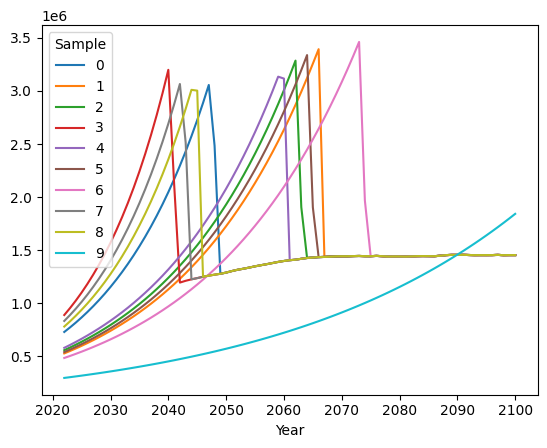

In [293]:
# TODO(drw): I'm a little skeptical that new paint will grow exponentially and suddenly hit a ceiling
new_painted_homes = number_of_painted_homes.groupby("Sample").diff()
new_painted_homes.head()
# new_painted_homes.loc[idx[:, :], 'Pakistan'].unstack(level=-1).T.plot()

#### % of prior year painted homes repainted

In our [first cost-effectiveness analysis](https://my.causal.app/models/61262) evaluating LEEP’s Malawi program, we used a conservative estimate for the repainting rate (2%) due to the relative lack of information available to inform this approximation. Since the original Malawi CEA was published, we have conducted informal surveys within our program countries to gather more information about repainting rates from relevant stakeholders. Data from these surveys suggest that repainting actually occurs about every 5-20 years within focus countries – implying a repainting rate within the range of 5-20%. In this CEA, we estimate the repainting rate at 4%. This is still a conservative estimate. In the future, we hope to conduct more formal data collection procedures that will allow us to further hone this estimate.

In [316]:
pct_of_prior_year_painted_homes_repainted = pd.Series(sq.lognorm(0.02, 0.1) @ N)
pct_of_prior_year_painted_homes_repainted.head()

0   0.050
1   0.024
2   0.031
3   0.025
4   0.051
dtype: float64

#### Number of homes repainted

In [319]:
number_of_homes_repainted = pd.DataFrame(
    index=SAMPLE_YEAR_INDEX, columns=COUNTRIES)

for year in YEARS[1:]:
    number_of_homes_repainted.loc[idx[:, year], :] = \
        number_of_painted_homes.loc[idx[:, year], :] * \
        pct_of_prior_year_painted_homes_repainted.values.reshape(-1, 1)

number_of_homes_repainted.head()
# number_of_homes_repainted.loc[idx[:, :], 'Pakistan'].unstack(level=-1)

Malawi  Madagascar Sierra Leone    Liberia      Angola  \
Sample Year                                                               
0      2021         NaN         NaN          NaN        NaN         NaN   
       2022  89,971.699 163,697.116   22,977.038 31,580.095 169,373.544   
       2023  95,275.157 173,346.380   24,331.439 33,441.610 179,357.411   
       2024 100,891.232 183,564.429   25,765.676 35,412.854 189,929.785   
       2025 106,838.350 194,384.789   27,284.456 37,500.295 201,125.356   

               Pakistan      Niger    Zimbabwe    Bolivia       Ghana  \
Sample Year                                                             
0      2021         NaN        NaN         NaN        NaN         NaN   
       2022 661,025.445 60,940.496 109,417.988 77,673.533 218,381.161   
       2023 699,990.148 64,532.685 115,867.724 82,252.065 231,253.823   
       2024 741,251.658 68,336.619 122,697.644 87,100.483 244,885.275   
       2025 784,945.363 72,364.778 129,930.161 92,234.694 259,320.244   

                  Nigeria Cote d'Ivoire    Senegal  
Sample Year                                         
0      2021           NaN           NaN        NaN  
       2022   863,423.198   272,880.588 41,407.938  
       2023   914,318.408   288,965.765 43,848.764  
       2024   968,213.678   305,999.096 46,433.466  
       2025 1,025,285.851   324,036.471 49,170.526

#### Counterfactual scenario